In [3]:
import pandas as pd
import numpy as np

df = pd.read_csv("/Users/janak/Downloads/merged_health_census_clean.csv",
                 dtype={"Tract_FIPS_full": str})
df.head()

,StateAbbr,PlaceName,PlaceFIPS,TractFIPS,Place_TractID,Tract_FIPS_full,Health_Pop,Obesity_Pct,Obesity_Count,Diabetes_Pct,...,Bachelors_Count,Unemployed_Pct,Unemployed_Count,Race_Total,Pct_White_Alone,Pct_Black_Alone,Pct_Asian_Alone,Majority_Race_Clean,Pct_Hispanic,Pct_Other
0,CA,Los Angeles,644000,6037206032,0644000-06037206032,06037206032,5275,29.5,1556.0,15.5,...,309,4.823990,185,5133,58.620690,0.935126,16.637444,Hispanic,77.089421,23.806741
1,CA,Pasadena,656000,6037462001,0656000-06037462001,06037462001,3974,32.0,1272.0,11.6,...,367,5.752670,167,3893,48.548677,10.608785,9.915232,Hispanic,70.459800,30.927305
2,CA,Fullerton,628000,6059011504,0628000-06059011504,06059011504,5473,18.7,1023.0,4.6,...,873,6.832522,379,6024,61.636786,1.626826,23.090969,White,30.378486,13.645418
3,TX,Longview,4843888,48183000401,4843888-48183000401,48183000401,3371,33.9,1143.0,9.2,...,201,4.592980,123,3170,82.965300,9.589905,3.470032,White,7.350158,3.974763
4,WI,Madison,5548000,55025002200,5548000-55025002200,55025002200,4254,29.5,1255.0,8.7,...,594,9.886264,339,4030,73.374690,11.116625,5.831266,White,8.263027,9.677419


In [4]:
print(df.columns)


Index(['StateAbbr', 'PlaceName', 'PlaceFIPS', 'TractFIPS', 'Place_TractID',
       'Tract_FIPS_full', 'Health_Pop', 'Obesity_Pct', 'Obesity_Count',
       'Diabetes_Pct', 'Diabetes_Count', 'HighChol_Pct', 'HighChol_Count',
       'HighBP_Pct', 'HighBP_Count', 'Stroke_Pct', 'Stroke_Count', 'Sleep_Pct',
       'Sleep_Count', 'MentalHealth_Pct', 'MentalHealth_Count', 'Asthma_Pct',
       'Asthma_Count', 'HeartDisease_Pct', 'HeartDisease_Count', 'Smoking_Pct',
       'Smoking_Count', 'State_FIPS', 'County_FIPS', 'Tract_FIPS',
       'State_Name', 'County_Name', 'Tract_Name', 'Median_Income',
       'Median_Age', 'Poverty_Pct', 'Poverty_Count', 'HS_Grad_Pct',
       'HS_Grad_Count', 'Bachelors_Pct', 'Bachelors_Count', 'Unemployed_Pct',
       'Unemployed_Count', 'Race_Total', 'Pct_White_Alone', 'Pct_Black_Alone',
       'Pct_Asian_Alone', 'Majority_Race_Clean', 'Pct_Hispanic', 'Pct_Other'],
      dtype='object')


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.preprocessing import StandardScaler

# Select predictors
X = df[['Sleep_Pct', 'Obesity_Pct', 'Asthma_Pct', 'Smoking_Pct', 'HeartDisease_Pct', 'HighBP_Pct', 'HighChol_Pct']]
y = df['MentalHealth_Pct']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale predictors
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit Lasso and Ridge
lasso = LassoCV(cv=5).fit(X_train_scaled, y_train)
ridge = RidgeCV(alphas=np.logspace(-3, 3, 7), cv=5).fit(X_train_scaled, y_train)

print("Lasso R²:", lasso.score(X_test_scaled, y_test))
print("Ridge R²:", ridge.score(X_test_scaled, y_test))
print("Lasso Coefficients:", dict(zip(X.columns, lasso.coef_)))


Lasso R²: 0.8666142925740412
Ridge R²: 0.8665394414409071
Lasso Coefficients: {'Sleep_Pct': np.float64(0.8584859609930936), 'Obesity_Pct': np.float64(1.0472271028732483), 'Asthma_Pct': np.float64(0.5517396013353701), 'Smoking_Pct': np.float64(1.651082165171346), 'HeartDisease_Pct': np.float64(1.2889310217226577), 'HighBP_Pct': np.float64(-1.9964670093255792), 'HighChol_Pct': np.float64(-0.1628771850242545)}


/Users/janak/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/janak/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/janak/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_
/Users/janak/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/janak/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/janak/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarn

/var/folders/kt/_bzbz3vd5qbcfjnt5vssmqxh0000gn/T/ipykernel_77426/3645983788.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coef_df, x='Coefficient', y='Feature', palette='coolwarm')


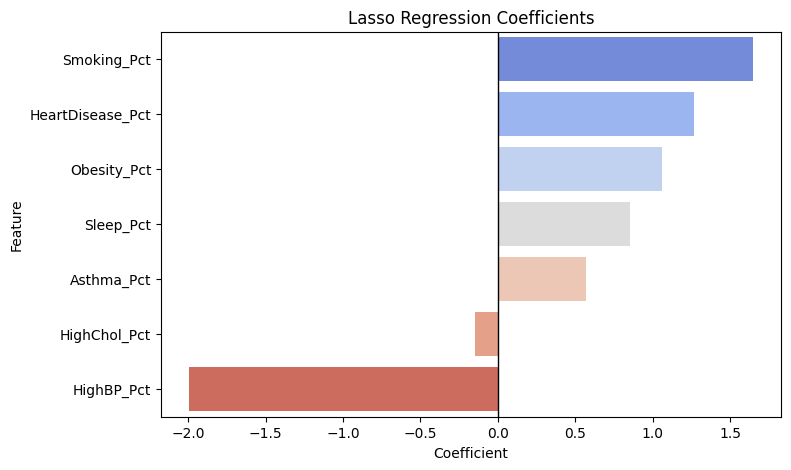

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler

# Scale and fit Lasso
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
lasso = LassoCV(cv=5, random_state=42)
lasso.fit(X_scaled, y)

# Coefficient plot
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lasso.coef_
}).sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(data=coef_df, x='Coefficient', y='Feature', palette='coolwarm')
plt.title('Lasso Regression Coefficients')
plt.axvline(0, color='black', linewidth=1)
plt.show()


/Users/janak/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/janak/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/janak/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_


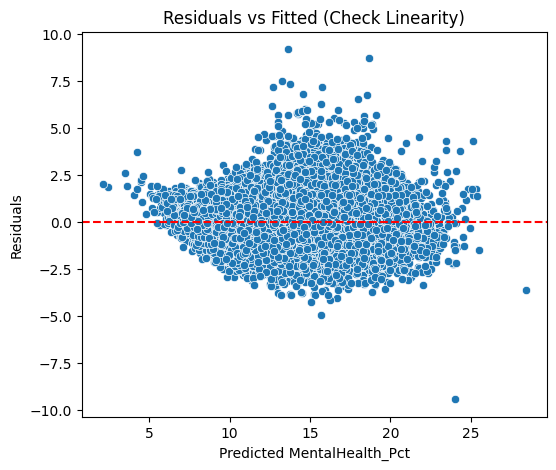

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Predictions
y_pred = lasso.predict(X_scaled)

# Residuals
residuals = y - y_pred

plt.figure(figsize=(6,5))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted MentalHealth_Pct')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted (Check Linearity)')
plt.show()
# There are no patterns so lineairty is in check
# scattered so homeskedasticity in check - also says it doesnt matter tahat much



In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print("Random Forest R²:", r2_score(y_test, y_pred))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print(importances)


Random Forest R²: 0.92512450323557
RMSE: 0.93404327171759
Smoking_Pct         0.809884
Sleep_Pct           0.048216
HighBP_Pct          0.034772
Asthma_Pct          0.034730
Obesity_Pct         0.029274
HighChol_Pct        0.025728
HeartDisease_Pct    0.017396
dtype: float64


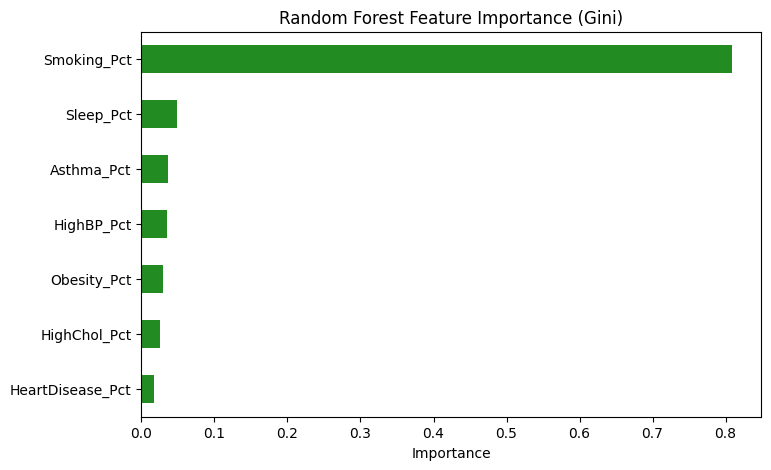

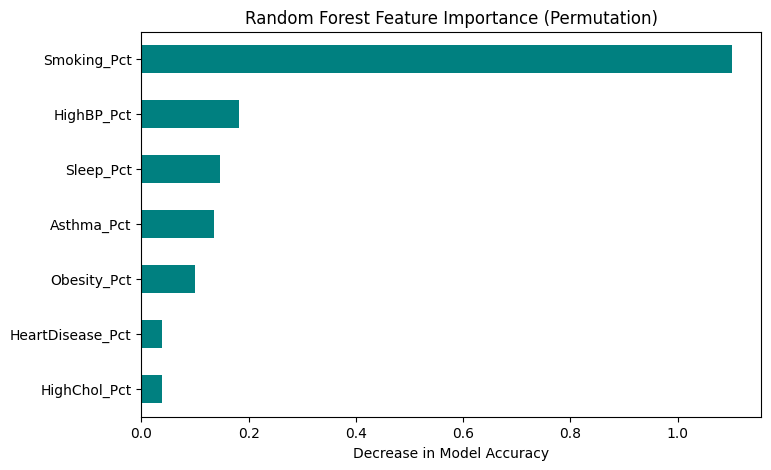

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.inspection import permutation_importance

# Train forest
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X, y)

# Gini-based importances - not good for highly correlated variables
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values()

plt.figure(figsize=(8,5))
importances.plot(kind='barh', color='forestgreen')
plt.title('Random Forest Feature Importance (Gini)')
plt.xlabel('Importance')
plt.show()

# Optional: permutation importances (more robust with correlated vars)
perm = permutation_importance(rf, X, y, n_repeats=10, random_state=42)
perm_df = pd.Series(perm.importances_mean, index=X.columns).sort_values()

plt.figure(figsize=(8,5))
perm_df.plot(kind='barh', color='teal')
plt.title('Random Forest Feature Importance (Permutation)')
plt.xlabel('Decrease in Model Accuracy')
plt.show()


| Visualization                     | What It Shows                                                                           | Why It’s Useful                                                                                        |
| --------------------------------- | --------------------------------------------------------------------------------------- | ------------------------------------------------------------------------------------------------------ |
| **Lasso Coefficient Plot**        | Linear influence (direction + magnitude) of each variable                               | Clear, interpretable model — helps you say *“which health factors most increase mental health issues”* |
| **Random Forest Importance Plot (trust permutation)** | How much each variable improves prediction accuracy, possibly through nonlinear effects | Shows complex relationships — helps you say *“which variables matter most for accurate predictions”*   |


| Model                      | Pros                                           | Cons                        |
| -------------------------- | ---------------------------------------------- | --------------------------- |
| **Lasso/Ridge Regression** | Interpretable, identifies strongest predictors | May miss nonlinear patterns |
| **Random Forest**          | Captures complex trends, robust                | Harder to interpret         |


| Model                          | Handles Multicollinearity? | How                                                                                                                                |
| ------------------------------ | -------------------------- | ---------------------------------------------------------------------------------------------------------------------------------- |
| **Ordinary Linear Regression** | ❌ No                       | Coefficients become unstable and inflated when predictors are correlated.                                                          |
| **Ridge Regression**           | ✅ Yes                      | Penalizes large coefficients; spreads weight among correlated predictors.                                                          |
| **Lasso Regression**           | ✅ Yes (even stronger)      | Can shrink some correlated coefficients to zero, effectively selecting variables.                                                  |
| **Random Forest**              | ⚠️ Partially               | It’s robust to collinearity because it randomly samples features, but it can still overemphasize correlated variables and overfit. |


checking for multicollinearity

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
corr = X.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')


In [ ]:
! pip install statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)


Attmpt to reduce dimensionality with pca ATTEMPT

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Scale the data (important before PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# View explained variance
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Explained Variance')
plt.show()


In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
print("Explained variance:", pca.explained_variance_ratio_)


In [ ]:
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

ridge = RidgeCV(alphas=np.logspace(-3, 3, 7), cv=5)
ridge.fit(X_train, y_train)

y_pred = ridge.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("R²:", r2)
print("RMSE:", rmse)


In [ ]:
pca_components = pd.DataFrame(pca.components_, columns=X.columns)
print(pca_components)


In [ ]:
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap='coolwarm')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA of Health Indicators colored by MentalHealth_Pct')
plt.colorbar(label='MentalHealth_Pct')
plt.show()


| Approach                    | Multicollinearity           | Interpretability                          | Use case                                                                                                         |
| --------------------------- | --------------------------- | ----------------------------------------- | ---------------------------------------------------------------------------------------------------------------- |
| **Ridge/Lasso on raw vars** | ✅ handled by regularization | High (you can read coefficients)          | When you want to know which health factors matter most                                                           |
| **PCA + Ridge**             | ✅ removed completely        | Low (PCs are combos, not actual features) | When predictors are *extremely* correlated and you just care about prediction accuracy / reducing dimensionality |


In your case, VIFs ≈ 50–100 ⇒ PCA makes sense if you want a clean, stable model with uncorrelated features.
But if your goal is to interpret which factors drive mental health (e.g., “Obesity matters more than Sleep”), you should stick with Ridge/Lasso directly on the original features — they’re designed for that. So basically just stick w lasso


| Model                          | High VIFs okay?         | Why                                     |
| ------------------------------ | ----------------------- | --------------------------------------- |
| **Ordinary Linear Regression** | ❌                       | Coefficients blow up, unstable          |
| **Ridge/Lasso**                | ✅                       | Regularization fixes it                 |
| **Random Forest**              | ✅ (for prediction)      | Nonlinear + bagging handles correlation |
| **Random Forest**              | ⚠️ (for interpretation) | Importance scores can be misleading     |


| **Model**                                               | **Why It Fits This Problem**                                                                                                                                                                      | **Strengths**                                                                                                                                                                                                                                                                           | **Limitations / Trade-offs**                                                                                                                                                                                      |
| ------------------------------------------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- | --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- | ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Lasso Regression (L1 Regularized Linear Regression)** | You’re working with several **highly correlated health variables** (obesity, high BP, cholesterol, etc.). Lasso helps identify which ones are *most important* while controlling for overfitting. | • Handles **multicollinearity** by shrinking or removing redundant predictors.<br>• Provides **interpretable coefficients** (you can see which health factors matter most).<br>• Simple and efficient — great baseline model.<br>• Works well if the relationship is mostly **linear**. | • Can miss **nonlinear relationships** (e.g., mental health increasing only after a threshold of obesity).<br>• May be sensitive to scaling — needs standardized predictors.                                      |
| **Random Forest Regressor**                             | Health outcomes often interact in **complex, nonlinear ways** (e.g., poor sleep + smoking together worsen mental health). Random Forest can capture those patterns automatically.                 | • Captures **nonlinear trends** and **interactions** between predictors.<br>• Robust to **outliers** and **multicollinearity**.<br>• High predictive performance even with messy, correlated data.<br>• Provides **feature importance** to identify key drivers.                        | • Less interpretable — can’t easily explain how much each variable changes `MentalHealth_Pct`.<br>• Feature importance can be **biased** when predictors are correlated.<br>• Slightly higher computational cost. |
